<a href="https://colab.research.google.com/github/andresaraque28/Ganaderia_De_Precision/blob/main/Precision_cattle_model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the following book, the validation and testing of a pre-trained YOLOv8 model with our dataset are presented.**

# *Install the Ultralytics library*

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.2/710.2 kB 4.8 MB/s eta 0:00:00


# *Import Yolo model from ultralytics*

In [2]:
from ultralytics import YOLO
import os
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# *Download the zip archive*

In [3]:
!wget https://storage.googleapis.com/theos-development-static-v1/cowsV82.zip

--2024-02-14 02:58:05--  https://storage.googleapis.com/theos-development-static-v1/cowsV82.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.207, 74.125.126.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7685710227 (7.2G) [application/zip]
Saving to: ‘cowsV82.zip’

cowsV82.zip         100%[===================>]   7.16G   150MB/s    in 64s     

2024-02-14 02:59:09 (114 MB/s) - ‘cowsV82.zip’ saved [7685710227/7685710227]



# *Unzip the file*

In [4]:
!unzip cowsV82.zip -d cowsV82

Archive:  cowsV82.zip
   creating: cowsV82/cows2v8/
  inflating: cowsV82/cows2v8/configuration.yaml  
   creating: cowsV82/cows2v8/train/
   creating: cowsV82/cows2v8/train/images/
  inflating: cowsV82/cows2v8/train/images/15ea8b35-bdb4-49c0-bea8-380fd3113804.JPG  
  inflating: cowsV82/cows2v8/train/images/e473e165-ebd7-4b7e-8653-2cc120bdd072.JPG  
  inflating: cowsV82/cows2v8/train/images/048af31c-be85-4060-9b0f-d1a0ec467577.JPG  
  inflating: cowsV82/cows2v8/train/images/04cc41d1-de5c-4ee9-a07f-89c73aa8a0ed.JPG  
  inflating: cowsV82/cows2v8/train/images/b642c05c-a42f-4116-be6f-099dcdbb2fa6.JPG  
  inflating: cowsV82/cows2v8/train/images/63df0582-6333-4411-b0e4-a8c399b6c097.JPG  
  inflating: cowsV82/cows2v8/train/images/b352d759-76d1-4f81-9137-c830f6be61f2.JPG  
  inflating: cowsV82/cows2v8/train/images/92761b7e-9466-4e22-9857-fe75e125e942.JPG  
  inflating: cowsV82/cows2v8/train/images/45867f18-7208-4dd4-9a42-876a36517cd8.JPG  
  inflating: cowsV82/cows2v8/train/images/fbdc3f95-cfa

# *Validation of the model with the previous weights and the data provided*

In [5]:
!yolo task=detect mode=val model= /content/model_cow.pt data='/content/cowsV82/cows2v8/configuration.yaml'

Ultralytics YOLOv8.1.13 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
100% 755k/755k [00:00<00:00, 17.7MB/s]
val: Scanning /content/cowsV82/cows2v8/valid/labels... 270 images, 32 backgrounds, 0 corrupt: 100% 302/302 [00:00<00:00, 1368.61it/s]
val: New cache created: /content/cowsV82/cows2v8/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [01:06<00:00,  3.49s/it]
                   all        302       3998       0.98       0.98      0.993      0.879
Speed: 0.5ms preprocess, 16.8ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# *Test the Model*

In [6]:
!yolo task=detect mode=predict model= /content/model_cow.pt conf=0.5 source='/content/cowsV82/cows2v8/test/images'

Ultralytics YOLOv8.1.13 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/144 /content/cowsV82/cows2v8/test/images/050c461d-762a-4d53-8c1f-5985affefc71.JPG: 480x640 18 cows, 112.5ms
image 2/144 /content/cowsV82/cows2v8/test/images/0be4cfb5-d6bf-4677-8014-15c0cd172533.JPG: 480x640 (no detections), 28.1ms
image 3/144 /content/cowsV82/cows2v8/test/images/0bfaae43-5e9c-4424-a6b2-21cb6340f760.JPG: 480x640 1 cow, 28.1ms
image 4/144 /content/cowsV82/cows2v8/test/images/0d9646c3-a017-4164-9bec-82e56316d608.JPG: 480x640 3 cows, 28.1ms
image 5/144 /content/cowsV82/cows2v8/test/images/0e0d79d9-f891-46a4-99af-86008ffc1db4.JPG: 480x640 12 cows, 28.1ms
image 6/144 /content/cowsV82/cows2v8/test/images/0f7884e5-0bc7-4698-bb09-a0406daa33b7.JPG: 384x640 33 cows, 72.4ms
image 7/144 /content/cowsV82/cows2v8/test/images/129eac87-26c5-4f37-a81b-a19e0555173b.JPG: 480x640 18 cows, 28.9ms
image 8/144 /content

# Validation Results

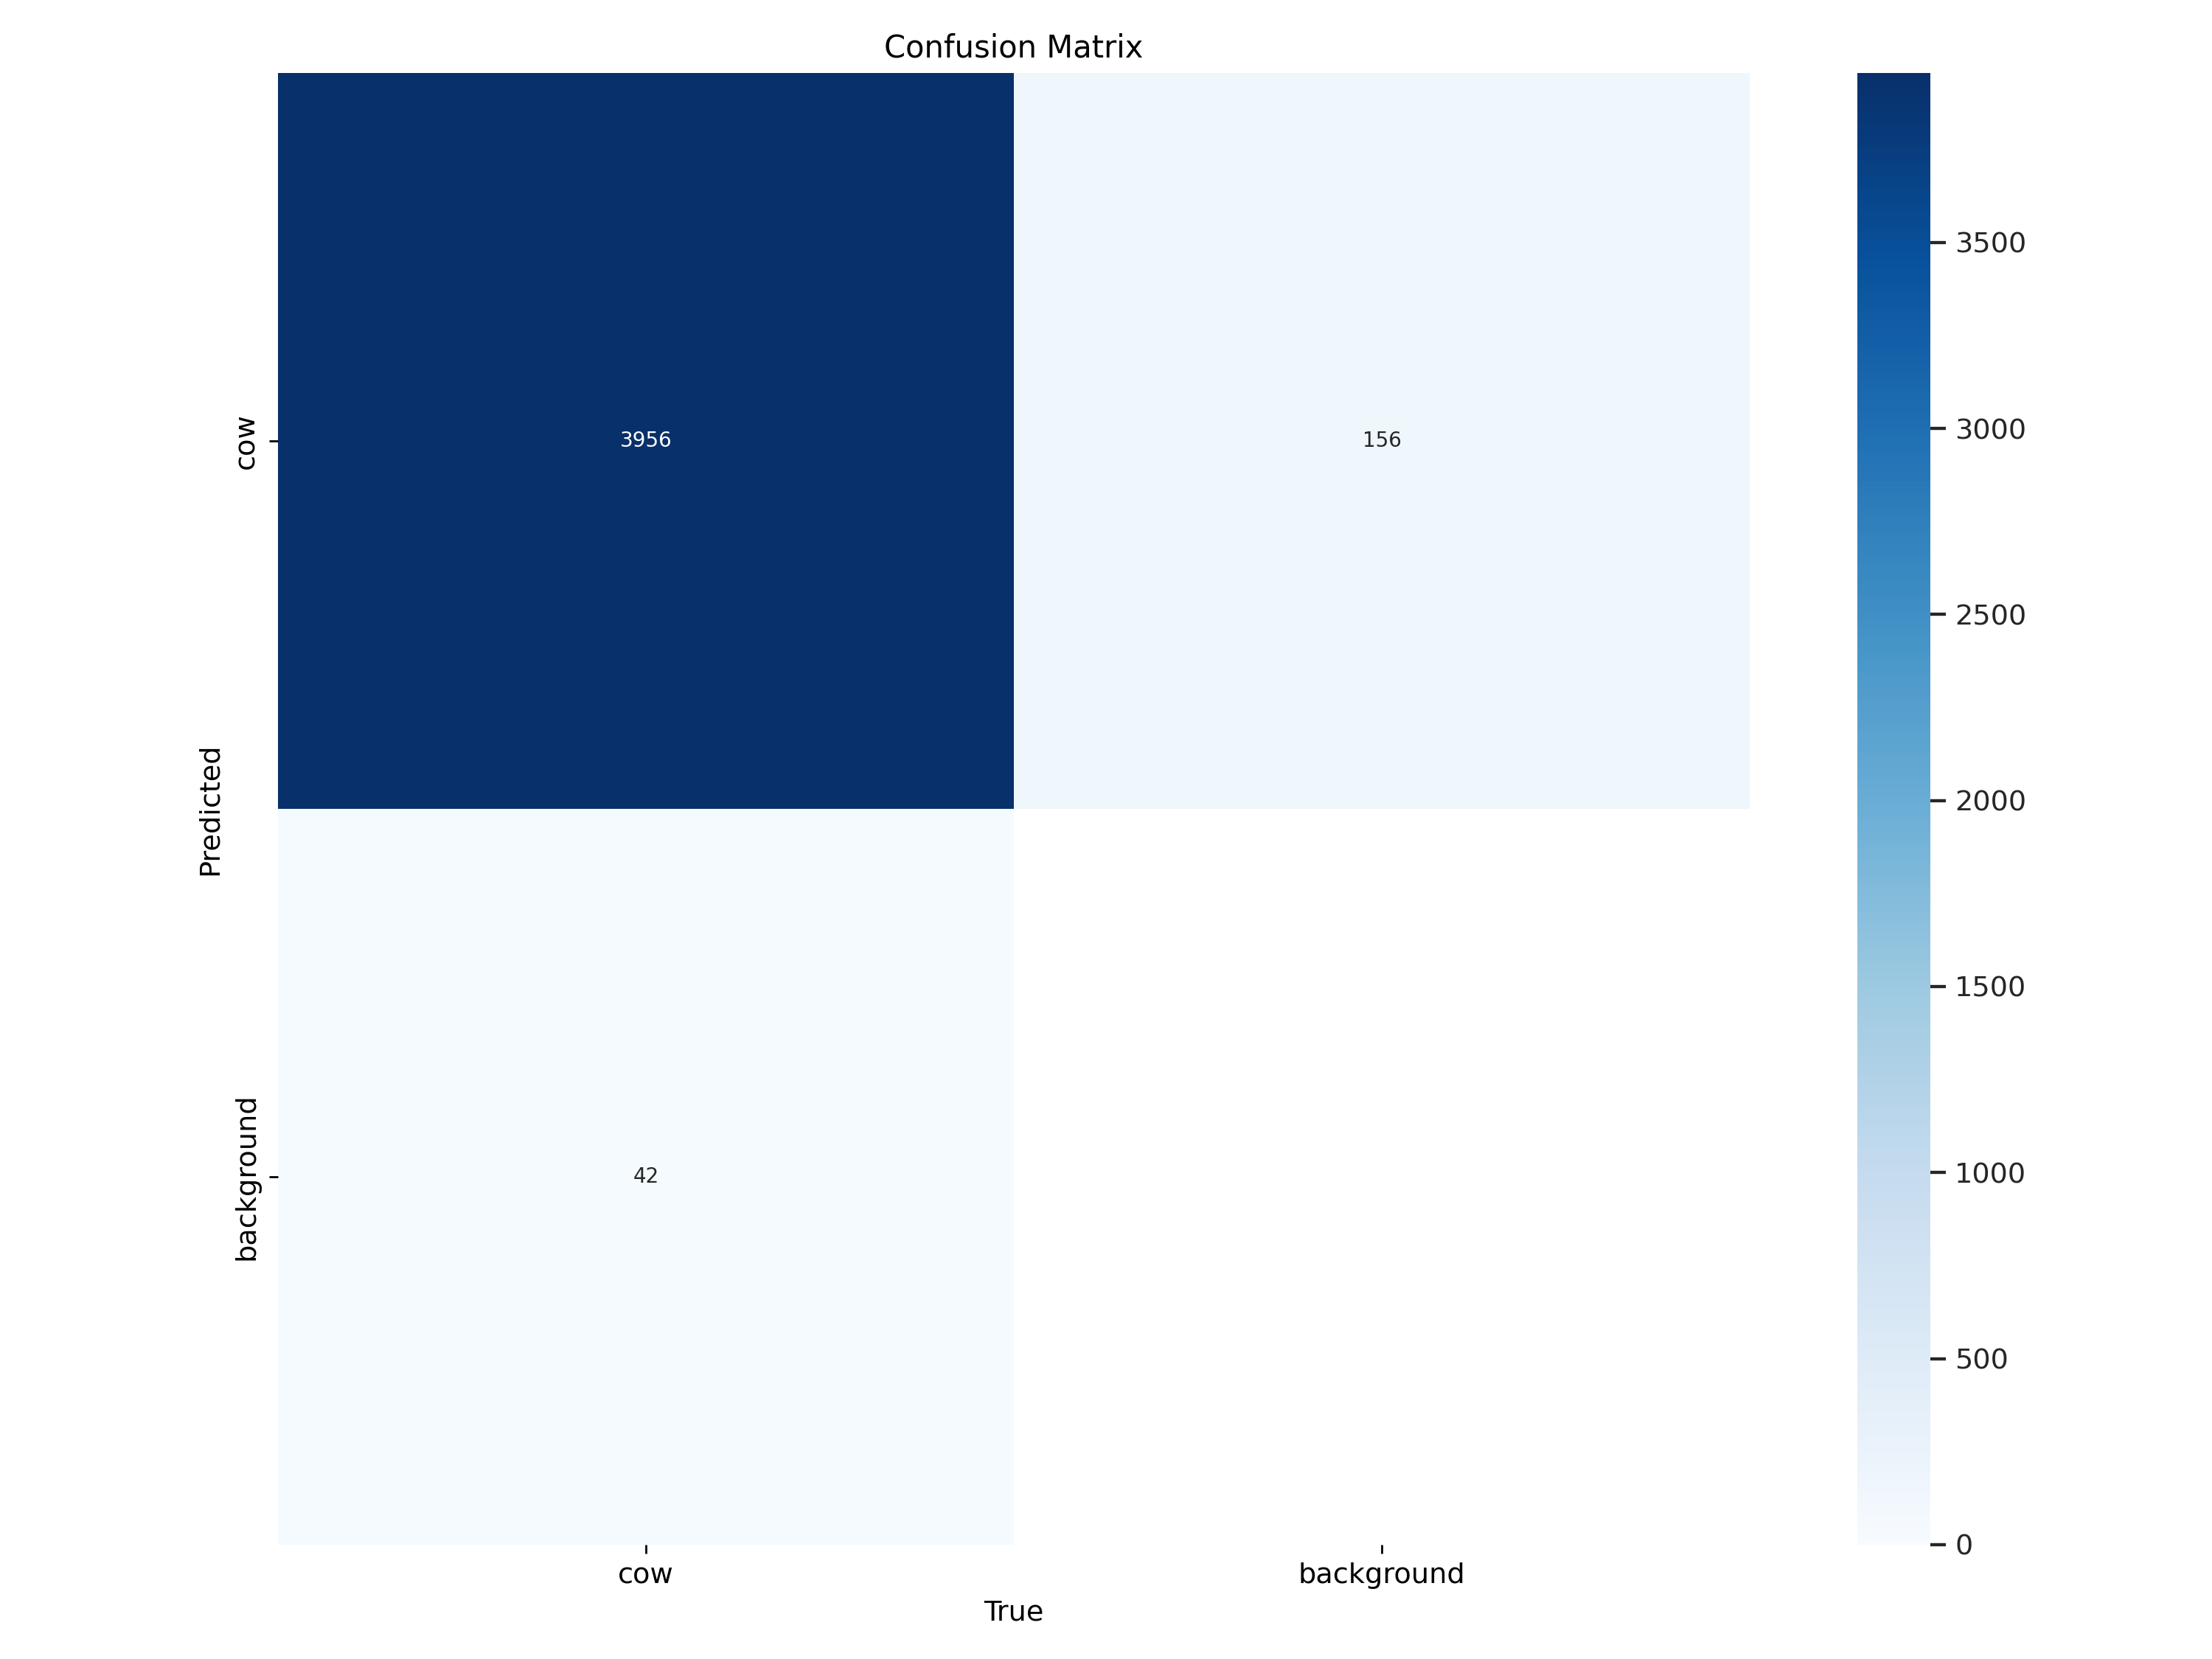

In [7]:
from IPython.display import Image, display, HTML
title = 'Confusion Matrix'

# Show image and title
display(HTML(f'{title}'))
print(' ')
Image(filename= f'/content/runs/detect/val/confusion_matrix.png', width= 600 )

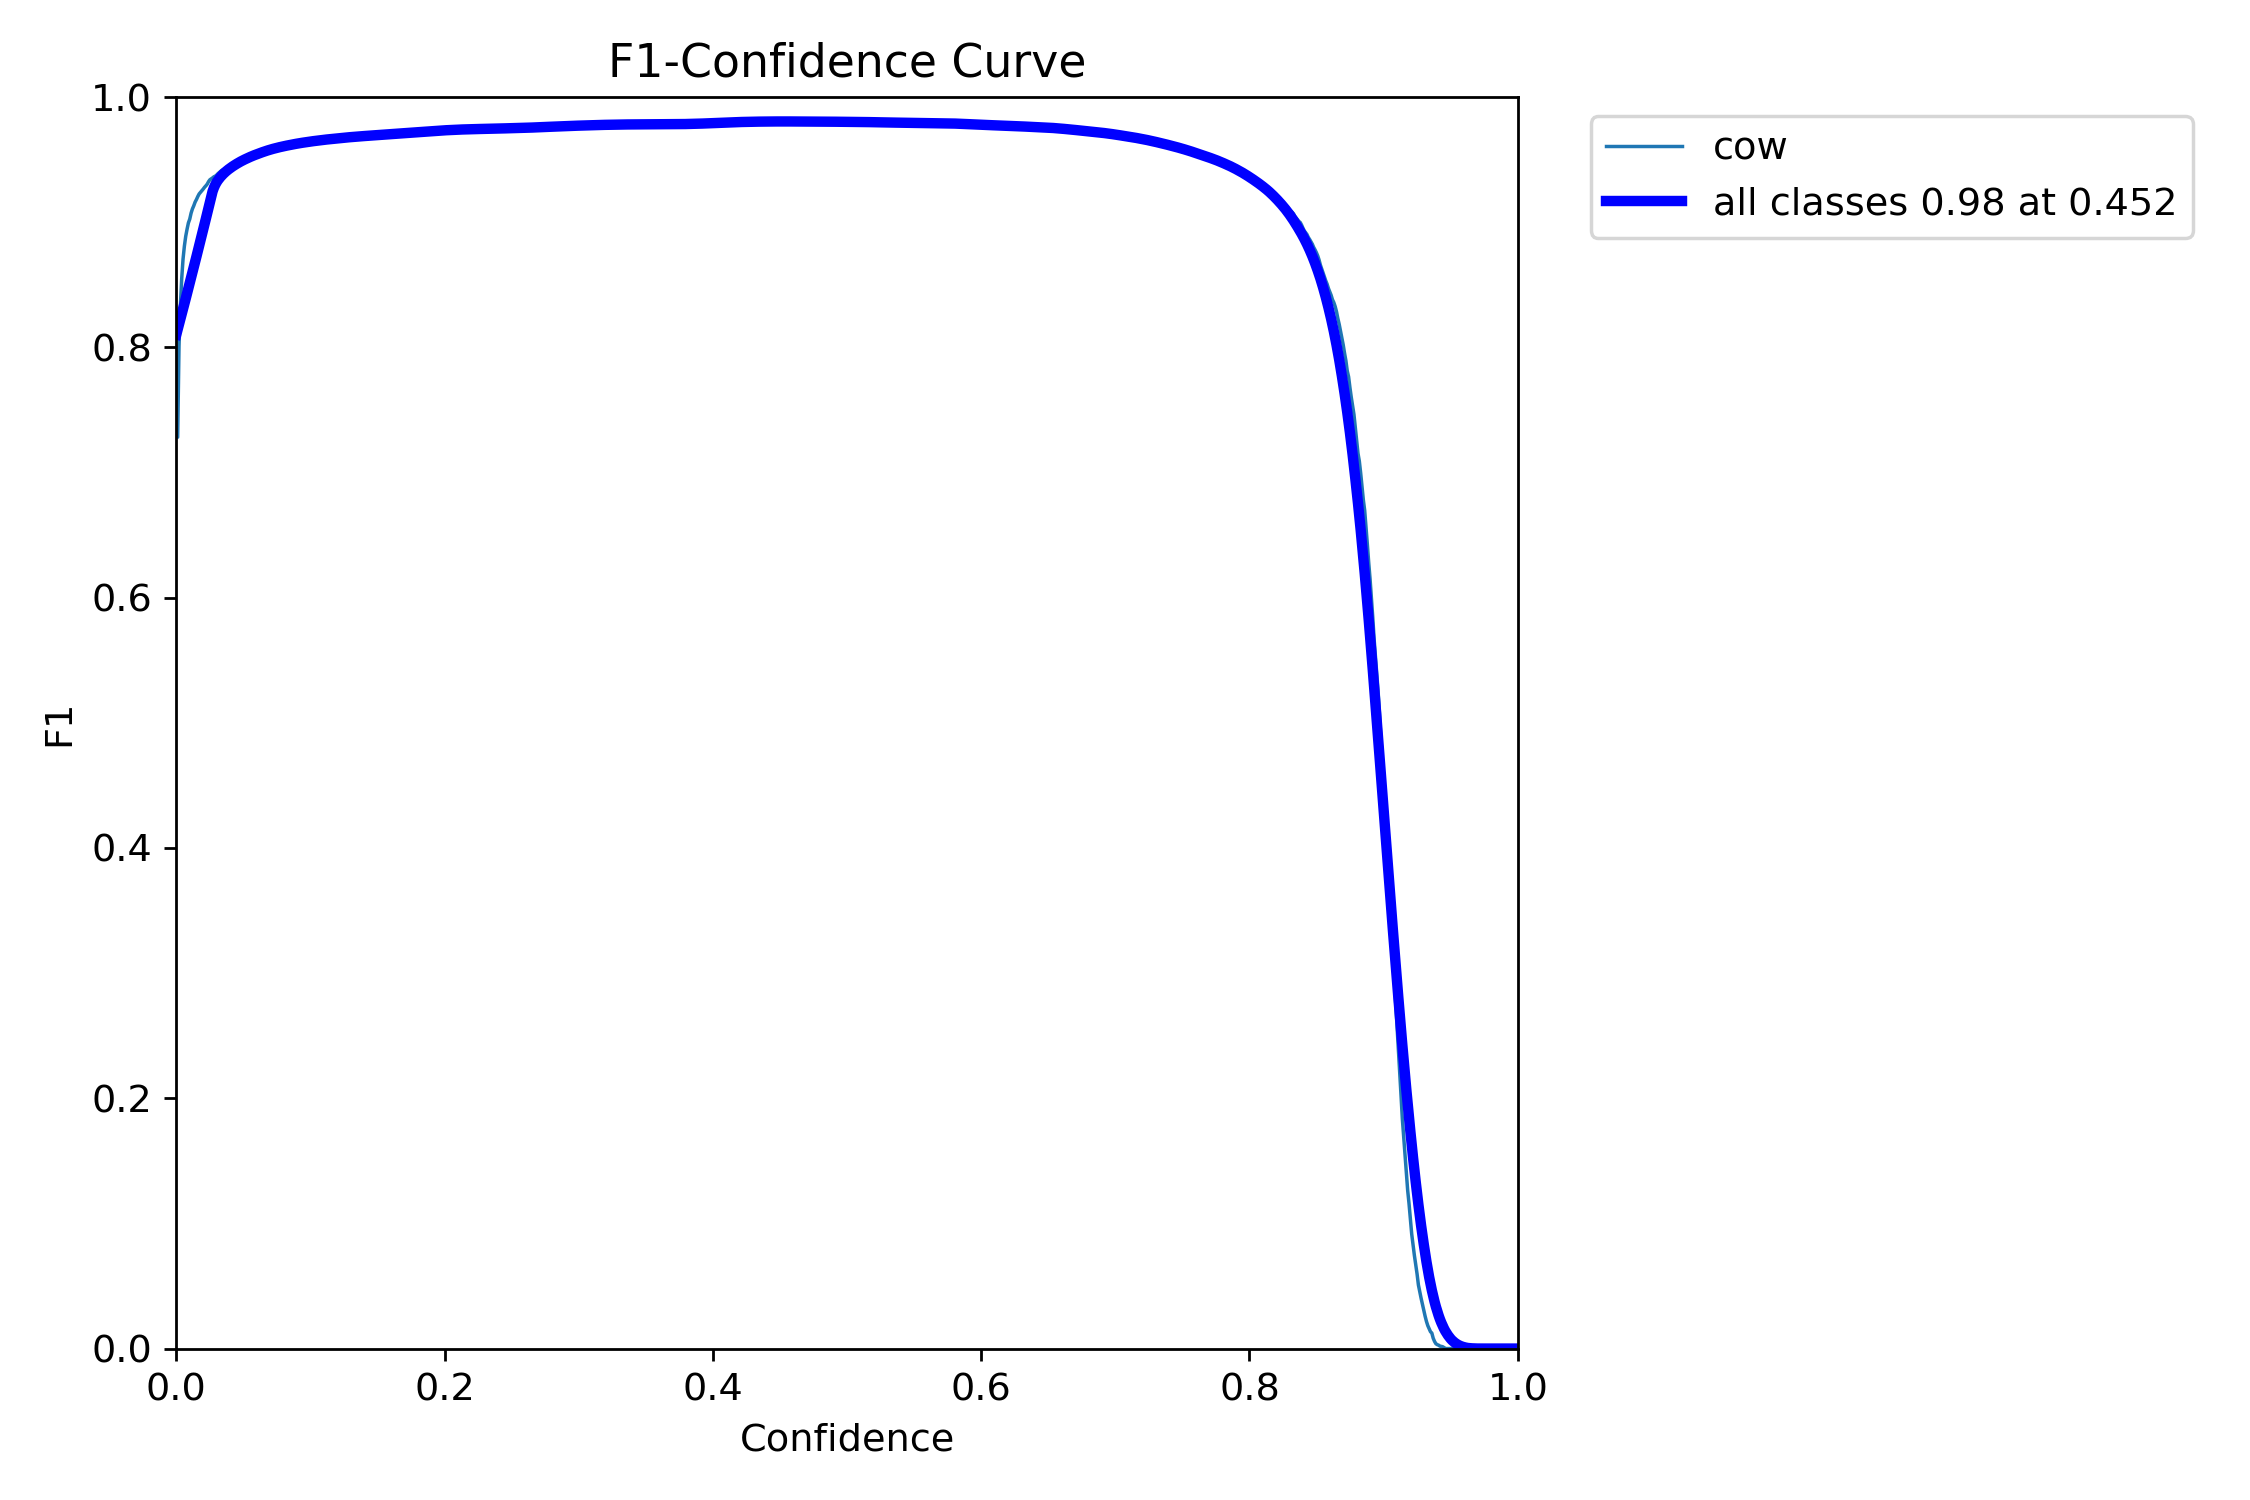

In [8]:
title = 'F1'

# Show image
display(HTML(f'{title}'))
Image(filename= f'/content/runs/detect/val/F1_curve.png', width= 600 )

In [9]:
#The model is loaded with the best weights obtained and defined as 'model' for later use.
model= YOLO('/content/model_cow.pt')

In [10]:
from PIL import Image

# Perform inference with the YOLOv8n model on the image 'DJI_0718.JPG'
test1 = model('/content/DJI_0718.JPG')

num_boxes = 0  # Variable to store the number of boxes, representing the number of cows

# Loop through the results to count the number of boxes
for result in test1:
    boxes = result.boxes  # Boxes object for bbox outputs
    num_boxes += len(boxes)

# Loop through the results to generate and display a plot for each
for r in test1:
    im_array = r.plot()  # Generate a plot as a numpy array in BGR format with predictions
    im = Image.fromarray(im_array[..., ::-1])  # Convert the array to a PIL image in RGB format
    im.show()  # Display the image
    im.save('results_0718.jpg')  # Save the image with the name 'results.jpg'


image 1/1 /content/DJI_0718.JPG: 480x640 8 cows, 69.8ms
Speed: 3.9ms preprocess, 69.8ms inference, 476.0ms postprocess per image at shape (1, 3, 480, 640)


# Show results

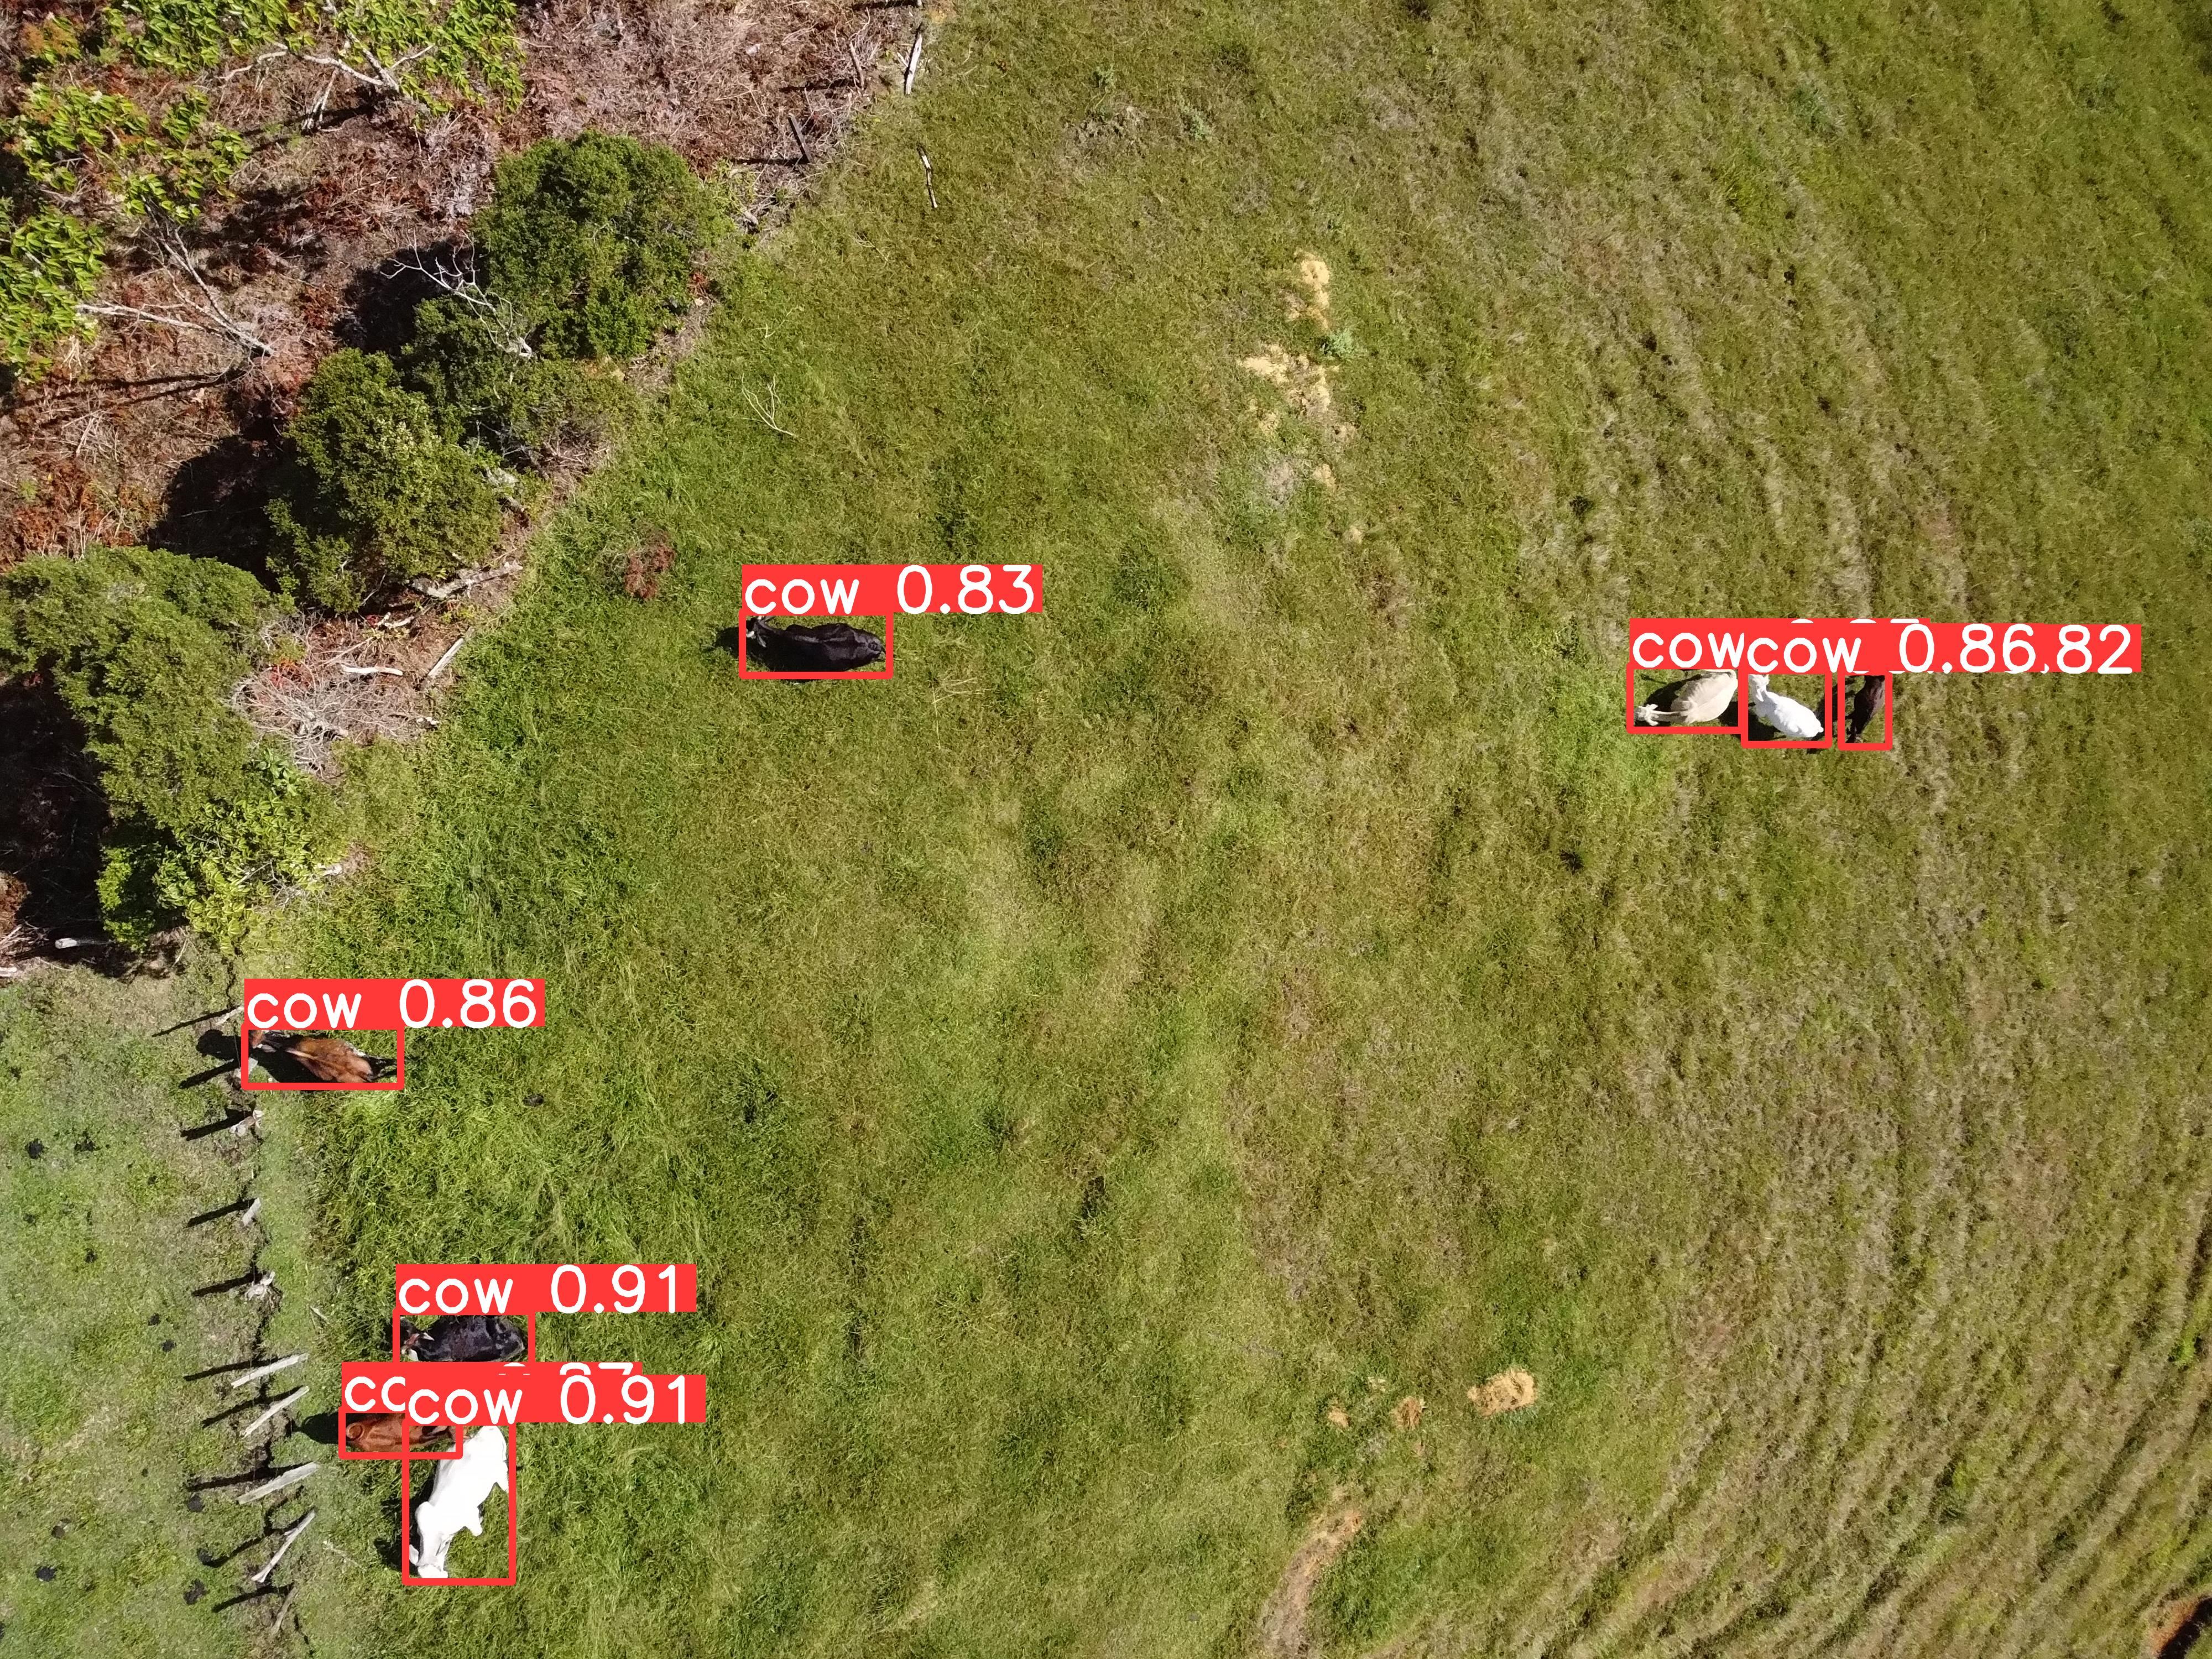

In [11]:
from IPython.display import Image, display, HTML

# Print results
title = 'Test 1'
im = f'{num_boxes} cows'  # Format the string with the number of cows

# Display the title
display(HTML(f'{title}'))

# Display the number of cows
display(HTML(f'{im}'))

# Display the image
Image(filename='/content/results_0718.jpg', width=500)


In [12]:
from PIL import Image

# Perform inference with the YOLOv8n model on the image 'DJI_0718.JPG'
test1 = model('/content/DJI_0795.JPG')

num_boxes = 0  # Variable to store the number of boxes, representing the number of cows

# Loop through the results to count the number of boxes
for result in test1:
    boxes = result.boxes  # Boxes object for bbox outputs
    num_boxes += len(boxes)

# Loop through the results to generate and display a plot for each
for r in test1:
    im_array = r.plot()  # Generate a plot as a numpy array in BGR format with predictions
    im = Image.fromarray(im_array[..., ::-1])  # Convert the array to a PIL image in RGB format
    im.show()  # Display the image
    im.save('results_0795.jpg')  # Save the image with the name 'results.jpg'


image 1/1 /content/DJI_0795.JPG: 480x640 4 cows, 28.1ms
Speed: 3.9ms preprocess, 28.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


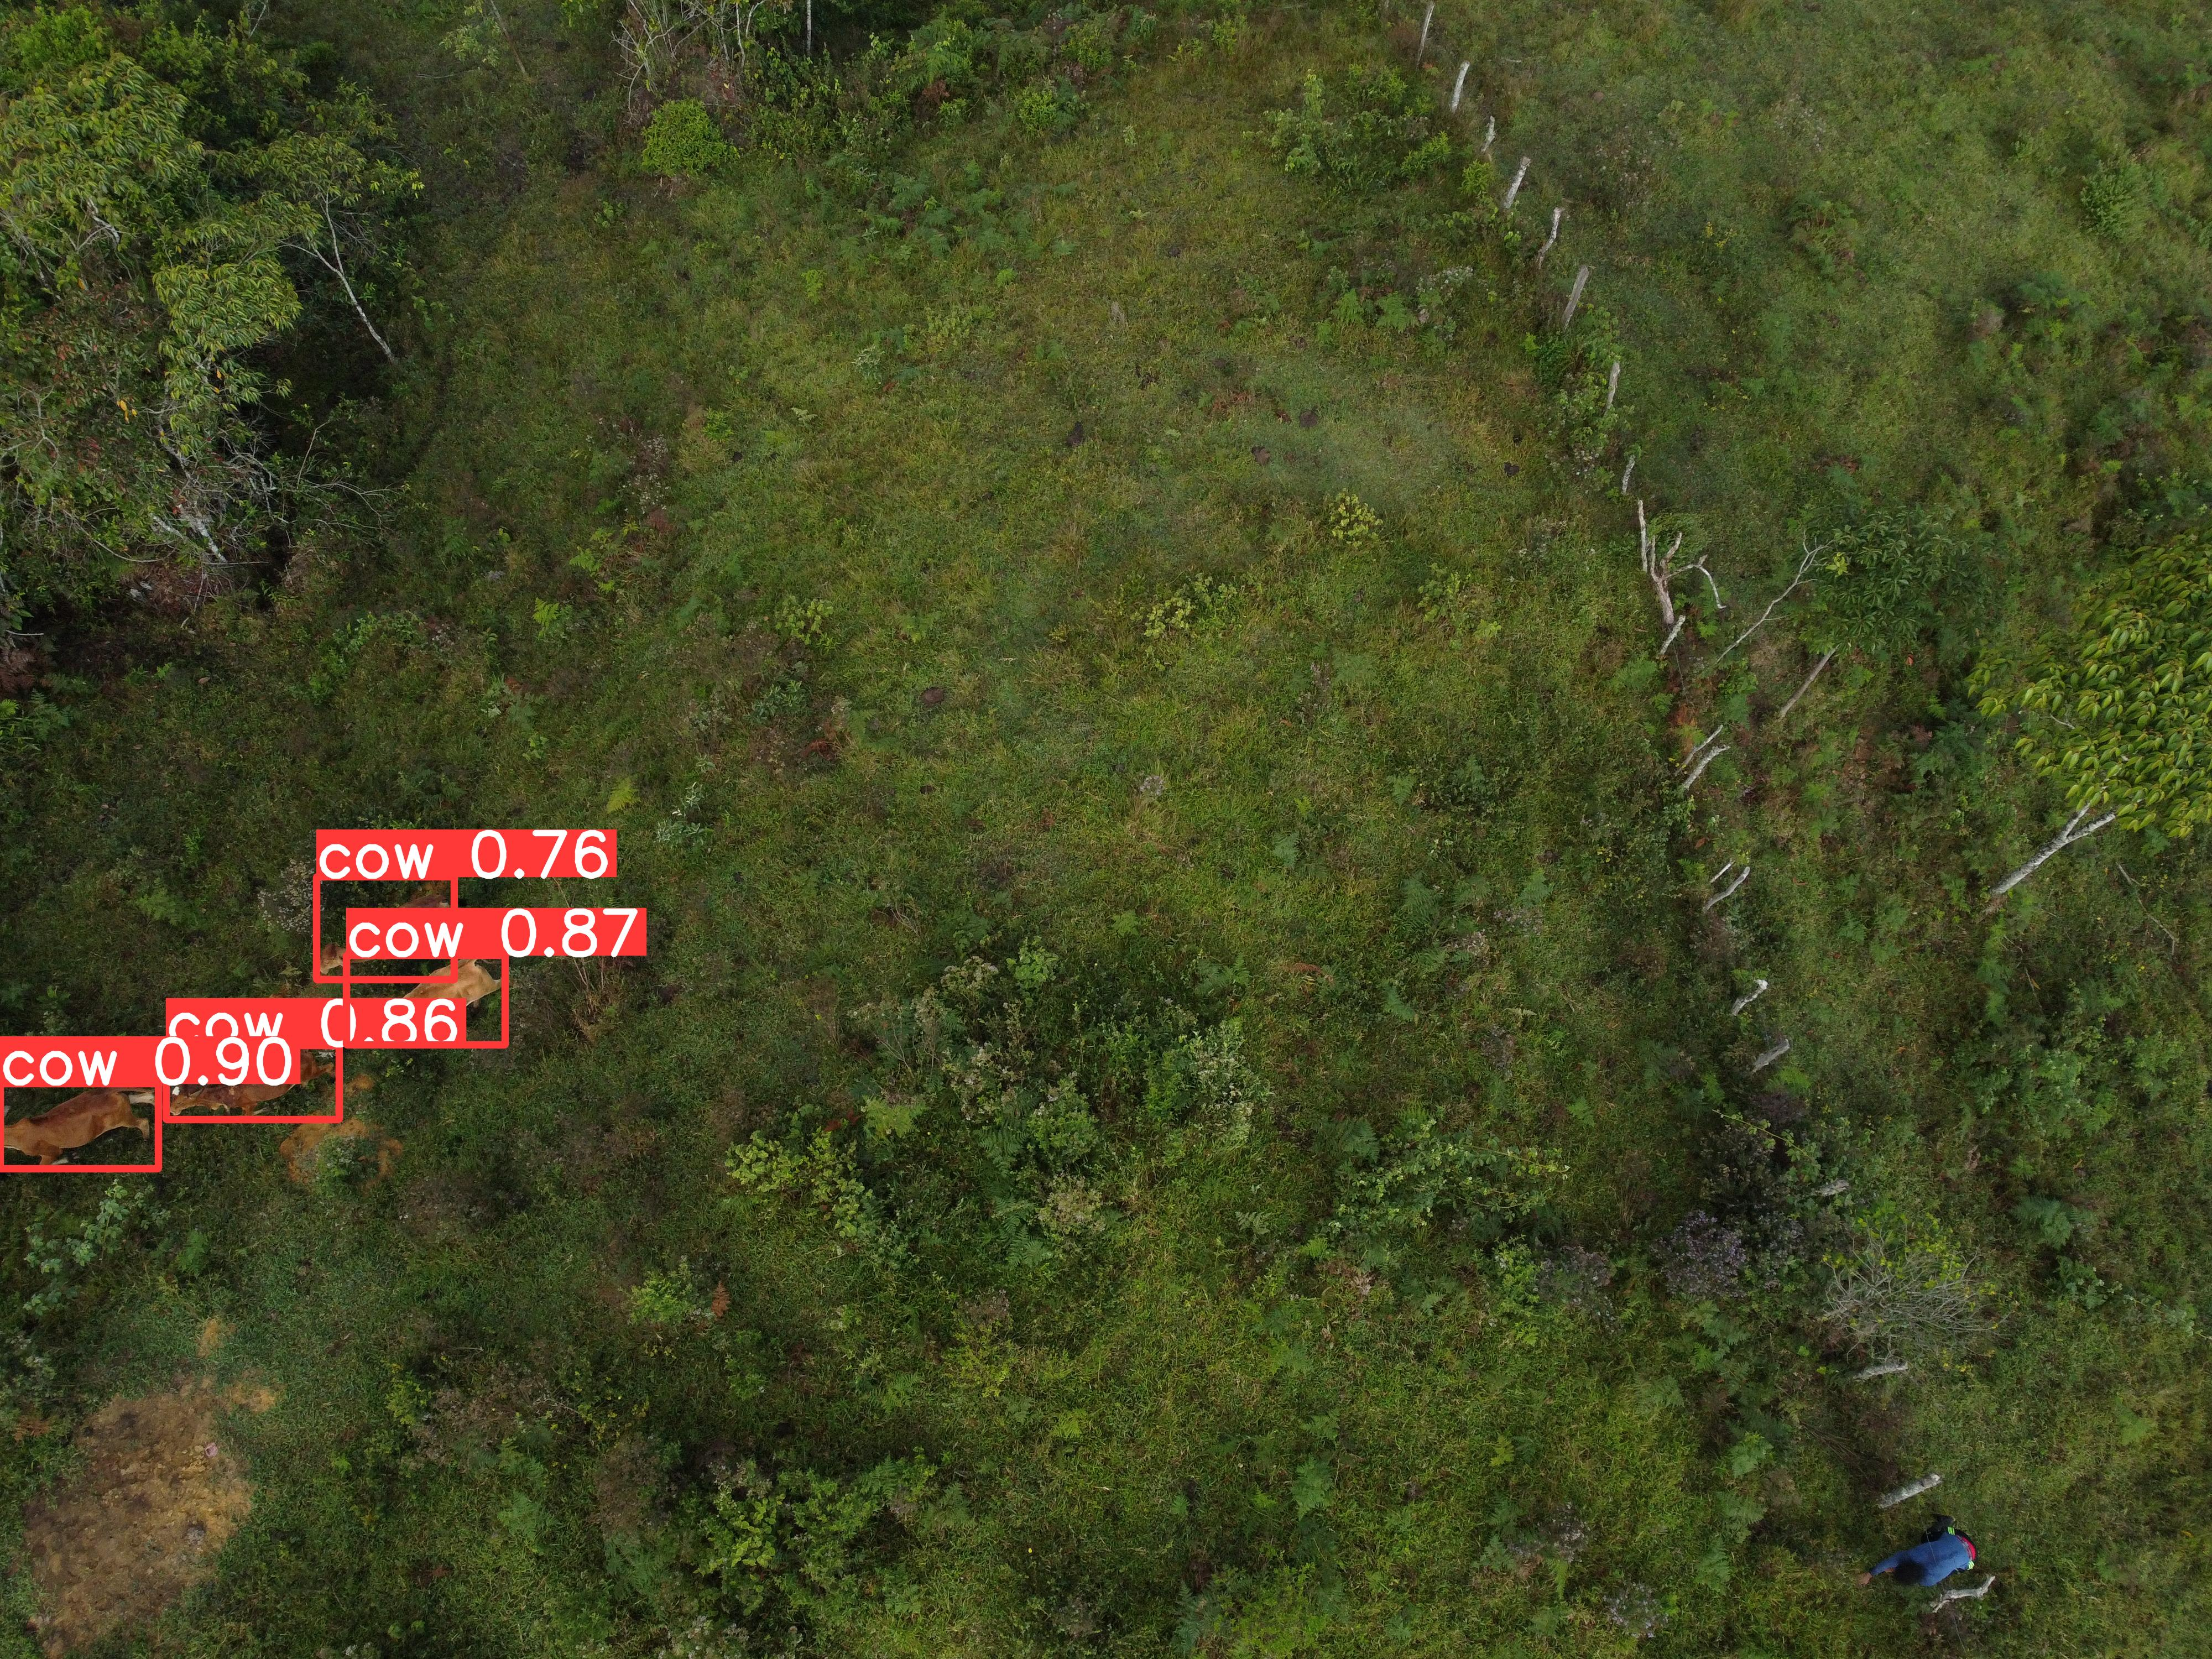

In [13]:
from IPython.display import Image, display, HTML

# Print results
title = 'Test 2'
im = f'{num_boxes} cows'  # Format the string with the number of cows

# Display the title
display(HTML(f'{title}'))

# Display the number of cows
display(HTML(f'{im}'))

# Display the image
Image(filename='/content/results_0795.jpg', width=500)

# *Use the model in a video*


In [14]:
!yolo task=detect mode=predict model= /content/runs/detect/train/weights/best.pt conf=0.5 source='/content/cows2.mp4'

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 134, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 215, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 709, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 634, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened_file:
 